# Proyek Analisis Data: Bike Sharing
- Nama: Arfan Armanto
- Email: arfanarmanto143@gmail.com
- Id Dicoding: arfanarmanto

## Menentukan Pertanyaan Bisnis

- Bagaimana performa penyewaan sepeda setiap jam atau harian
  berdasarkan musim ?
- Bagaimana performa penyewaan sepeda setiap jam atau harian
  berdasarkan lingkungan ?

## Menyiapkan semua library yang dibutuhkan

In [1]:
# Mengimport Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

## Data Wrangling

### Gathering Data

In [2]:
# Membaca data penyewaan dalam hitungan hari
day_df = pd.read_csv("https://raw.githubusercontent.com/arrrfan04/Proyek_Analisis_Data/main/Data/day.csv")
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,6,0,2,0.344167,0.363625,0.805833,0.160446,331,654,985
1,2,1/2/2011,1,0,1,0,0,0,2,0.363478,0.353739,0.696087,0.248539,131,670,801
2,3,1/3/2011,1,0,1,0,1,1,1,0.196364,0.189405,0.437273,0.248309,120,1229,1349
3,4,1/4/2011,1,0,1,0,2,1,1,0.200000,0.212122,0.590435,0.160296,108,1454,1562
4,5,1/5/2011,1,0,1,0,3,1,1,0.226957,0.229270,0.436957,0.186900,82,1518,1600


In [3]:
# Membaca data penyewaan dalam hitungan jam
hour_df = pd.read_csv("https://raw.githubusercontent.com/arrrfan04/Proyek_Analisis_Data/main/Data/hour.csv")
hour_df.head()

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,1/1/2011,1,0,1,0,0,6,0,1,0.24,0.2879,0.81,0.0,3,13,16
1,2,1/1/2011,1,0,1,1,0,6,0,1,0.22,0.2727,0.80,0.0,8,32,40
2,3,1/1/2011,1,0,1,2,0,6,0,1,0.22,0.2727,0.80,0.0,5,27,32
3,4,1/1/2011,1,0,1,3,0,6,0,1,0.24,0.2879,0.75,0.0,3,10,13
4,5,1/1/2011,1,0,1,4,0,6,0,1,0.24,0.2879,0.75,0.0,0,1,1


### Assessing Data

In [4]:
# Memeriksa tipe data pada data day_df dan melihat missing value
day_df.info()
day_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     731 non-null    int64  
 1   dteday      731 non-null    object 
 2   season      731 non-null    int64  
 3   yr          731 non-null    int64  
 4   mnth        731 non-null    int64  
 5   holiday     731 non-null    int64  
 6   weekday     731 non-null    int64  
 7   workingday  731 non-null    int64  
 8   weathersit  731 non-null    int64  
 9   temp        731 non-null    float64
 10  atemp       731 non-null    float64
 11  hum         731 non-null    float64
 12  windspeed   731 non-null    float64
 13  casual      731 non-null    int64  
 14  registered  731 non-null    int64  
 15  cnt         731 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.5+ KB


instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [5]:
# Memeriksa duplikasi data pada data day_df
print("Jumlah duplikasi: ", day_df.duplicated().sum())
# Menampilkan parameter statistik
day_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
mean,366.000000,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000
50%,366.000000,3.000000,1.000000,7.000000,0.000000,3.000000,1.000000,1.000000,0.498333,0.486733,0.626667,0.180975,713.000000,3662.000000,4548.000000
75%,548.500000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,0.655417,0.608602,0.730209,0.233214,1096.000000,4776.500000,5956.000000
max,731.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,0.861667,0.840896,0.972500,0.507463,3410.000000,6946.000000,8714.000000


In [6]:
# Memeriksa tipe data pada data hour_df dan melihat missing value
hour_df.info()
hour_df.isna().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     17379 non-null  int64  
 1   dteday      17379 non-null  object 
 2   season      17379 non-null  int64  
 3   yr          17379 non-null  int64  
 4   mnth        17379 non-null  int64  
 5   hr          17379 non-null  int64  
 6   holiday     17379 non-null  int64  
 7   weekday     17379 non-null  int64  
 8   workingday  17379 non-null  int64  
 9   weathersit  17379 non-null  int64  
 10  temp        17379 non-null  float64
 11  atemp       17379 non-null  float64
 12  hum         17379 non-null  float64
 13  windspeed   17379 non-null  float64
 14  casual      17379 non-null  int64  
 15  registered  17379 non-null  int64  
 16  cnt         17379 non-null  int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 2.3+ MB


instant       0
dteday        0
season        0
yr            0
mnth          0
hr            0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [7]:
# Memeriksa duplikasi data pada data hour_df
print("Jumlah duplikasi: ", hour_df.duplicated().sum())
# Menampilkan parameter statistik
hour_df.describe()

Jumlah duplikasi:  0


,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,17379.0000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000,17379.000000
mean,8690.0000,2.501640,0.502561,6.537775,11.546752,0.028770,3.003683,0.682721,1.425283,0.496987,0.475775,0.627229,0.190098,35.676218,153.786869,189.463088
std,5017.0295,1.106918,0.500008,3.438776,6.914405,0.167165,2.005771,0.465431,0.639357,0.192556,0.171850,0.192930,0.122340,49.305030,151.357286,181.387599
min,1.0000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,4345.5000,2.000000,0.000000,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.480000,0.104500,4.000000,34.000000,40.000000
50%,8690.0000,3.000000,1.000000,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.500000,0.484800,0.630000,0.194000,17.000000,115.000000,142.000000
75%,13034.5000,3.000000,1.000000,10.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.780000,0.253700,48.000000,220.000000,281.000000
max,17379.0000,4.000000,1.000000,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,1.000000,1.000000,0.850700,367.000000,886.000000,977.000000


### Cleaning Data

In [8]:
# Mengubah tipe data pada data day_df kolom dteday menjadi datetime
datetime_columns = ["dteday"]

for column in datetime_columns:
  day_df[column] = pd.to_datetime(day_df[column])

day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 731 entries, 0 to 730
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     731 non-null    int64         
 1   dteday      731 non-null    datetime64[ns]
 2   season      731 non-null    int64         
 3   yr          731 non-null    int64         
 4   mnth        731 non-null    int64         
 5   holiday     731 non-null    int64         
 6   weekday     731 non-null    int64         
 7   workingday  731 non-null    int64         
 8   weathersit  731 non-null    int64         
 9   temp        731 non-null    float64       
 10  atemp       731 non-null    float64       
 11  hum         731 non-null    float64       
 12  windspeed   731 non-null    float64       
 13  casual      731 non-null    int64         
 14  registered  731 non-null    int64         
 15  cnt         731 non-null    int64         
dtypes: datetime64[ns](1), floa

In [9]:
# Mengubah tipe data pada data hour_df kolom dteday menjadi datetime
datetime_columns = ["dteday"]

for column in datetime_columns:
  hour_df[column] = pd.to_datetime(hour_df[column])

hour_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17379 entries, 0 to 17378
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   instant     17379 non-null  int64         
 1   dteday      17379 non-null  datetime64[ns]
 2   season      17379 non-null  int64         
 3   yr          17379 non-null  int64         
 4   mnth        17379 non-null  int64         
 5   hr          17379 non-null  int64         
 6   holiday     17379 non-null  int64         
 7   weekday     17379 non-null  int64         
 8   workingday  17379 non-null  int64         
 9   weathersit  17379 non-null  int64         
 10  temp        17379 non-null  float64       
 11  atemp       17379 non-null  float64       
 12  hum         17379 non-null  float64       
 13  windspeed   17379 non-null  float64       
 14  casual      17379 non-null  int64         
 15  registered  17379 non-null  int64         
 16  cnt         17379 non-

## Exploratory Data Analysis (EDA)

### Explore Data day_df

In [10]:
# Menampilkan parameter statistik secara keseluruhan
day_df.describe(include="all")

<ipython-input-10-f6cc2b052f0e>:2: FutureWarning: Treating datetime data as categorical rather than numeric in `.describe` is deprecated and will be removed in a future version of pandas. Specify `datetime_is_numeric=True` to silence this warning and adopt the future behavior now.
  day_df.describe(include="all")


,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,731.000000,731,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000,731.000000
unique,NaN,731,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
first,NaN,2011-01-01 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
last,NaN,2012-12-31 00:00:00,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,366.000000,NaN,2.496580,0.500684,6.519836,0.028728,2.997264,0.683995,1.395349,0.495385,0.474354,0.627894,0.190486,848.176471,3656.172367,4504.348837
std,211.165812,NaN,1.110807,0.500342,3.451913,0.167155,2.004787,0.465233,0.544894,0.183051,0.162961,0.142429,0.077498,686.622488,1560.256377,1937.211452
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.059130,0.079070,0.000000,0.022392,2.000000,20.000000,22.000000
25%,183.500000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,0.337083,0.337842,0.520000,0.134950,315.500000,2497.000000,3152.000000


In [11]:
# Melihat data berdasarkan musim
day_df.groupby(by="season").agg({
    "instant": "nunique",
    "mnth": ["max", "min", "mean", "std"]
})

instant mnth                         
       nunique  max min       mean       std
season                                      
1          181   12   1   3.093923  3.403759
2          184    6   3   4.652174  0.951671
3          188    9   6   7.691489  0.948137
4          178   12   9  10.696629  0.919402

In [12]:
# Melihat data berdasarkan hari
day_df.groupby(by="mnth").agg({
    "instant": "nunique",
    "holiday": ["sum"],
    "weekday": ["sum"],
    "workingday": ["sum"]
})

,instant,holiday,weekday,workingday
,nunique,sum,sum,sum
mnth,,,,
1,62,3,178,40
2,57,2,171,39
3,62,0,192,45
4,60,2,180,40
5,62,2,180,43
6,60,0,186,43
7,62,2,182,41
8,62,0,186,46


In [13]:
# Melihat data berdasarkan cuaca
day_df.groupby(by="weathersit").instant.nunique().sort_values(ascending=False)

weathersit
1    463
2    247
3     21
Name: instant, dtype: int64

In [14]:
# Melihat data berdasarkan banyak penyewaan
day_df.groupby(by="mnth").agg({
    "instant": "nunique",
    "casual": ["sum"],
    "registered": ["sum"]
})

,instant,casual,registered
,nunique,sum,sum
mnth,,,
1,62,12042,122891
2,57,14963,136389
3,62,44444,184476
4,60,60802,208292
5,62,75285,256401
6,60,73906,272436
7,62,78157,266791
8,62,72039,279155


### Explore Data hour_df

In [15]:
# Melihat data berdasarkan musim
hour_df.groupby(by="season").agg({
    "instant": "nunique",
    "mnth": ["max", "min", "mean", "std"]
})

instant mnth                         
       nunique  max min       mean       std
season                                      
1         4242   12   1   3.119755  3.411534
2         4409    6   3   4.654117  0.948483
3         4496    9   6   7.689724  0.946649
4         4232   12   9  10.702505  0.918886

In [16]:
# Melihat data berdasarkan jam
hour_df.groupby(by="hr").agg({
    "instant": "nunique",
    "holiday": ["sum"],
    "weekday": ["sum"],
    "workingday": ["sum"]
})

,instant,holiday,weekday,workingday
,nunique,sum,sum,sum
hr,,,,
0,726,21,2181,496
1,724,21,2178,494
2,715,21,2165,487
3,697,18,2110,470
4,697,20,2099,470
5,717,21,2168,495
6,725,21,2182,496
7,727,21,2182,496


In [17]:
# Melihat data berdasarkan cuaca
hour_df.groupby(by="weathersit").instant.nunique().sort_values(ascending=False)

weathersit
1    11413
2     4544
3     1419
4        3
Name: instant, dtype: int64

## Visualization & Explanatory Analysis

### Pertanyaan 1: Bagaimana performa penyewaan sepeda setiap jam atau harian berdasarkan musim ?

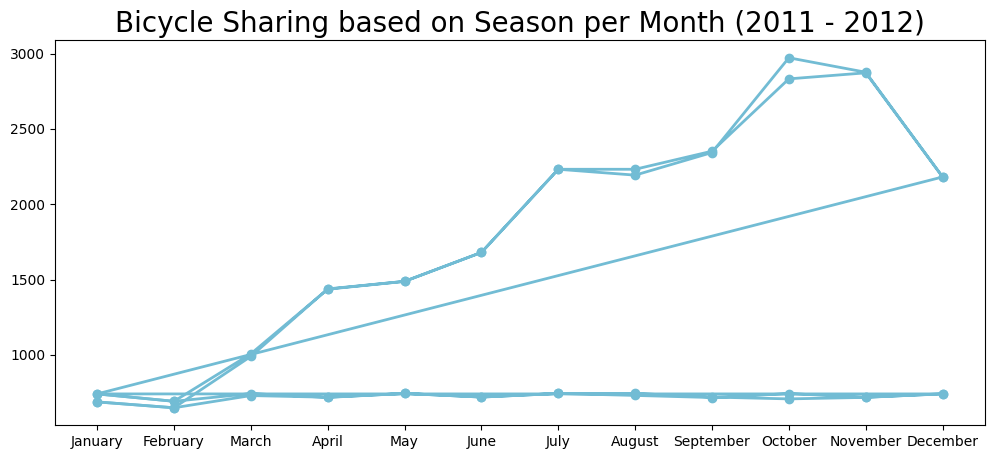

In [23]:
# Visualisasi data pemakaian sepeda berdasarkan musim per bulan
season_df = hour_df.resample(rule='M', on='dteday').agg({
    "instant": "nunique",
    "season": "sum"
})
season_df.index = season_df.index.strftime('%B') #mengubah format date day menjadi nama bulan

season_df = season_df.reset_index()
season_df.rename(columns={
    "instant": "season",
}, inplace=True)

plt.figure(figsize=(12, 5))
plt.plot(season_df["dteday"], season_df["season"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Bicycle Sharing based on Season per Month (2011 - 2012)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Pertanyaan 2: Bagaimana performa penyewaan sepeda setiap jam atau harian berdasarkan lingkungan ?

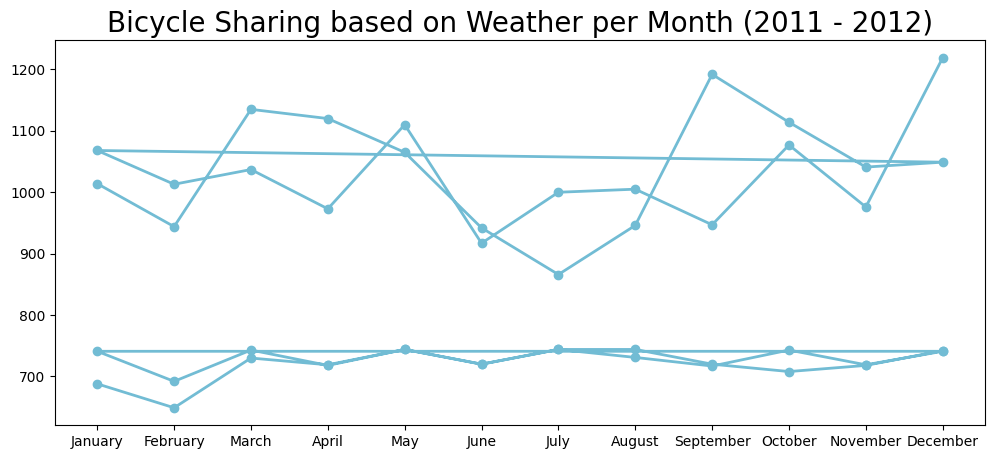

In [24]:
# Visualisasi data pemakaian sepeda berdasarkan cuaca per bulan
weathersit_df = hour_df.resample(rule='M', on='dteday').agg({
    "instant": "nunique",
    "weathersit": "sum"
})
weathersit_df.index = weathersit_df.index.strftime('%B') #mengubah format date day menjadi nama bulan

weathersit_df = weathersit_df.reset_index()
weathersit_df.rename(columns={
    "instant": "weathersit",
}, inplace=True)

plt.figure(figsize=(12, 5))
plt.plot(weathersit_df["dteday"], weathersit_df["weathersit"], marker='o', linewidth=2, color="#72BCD4")
plt.title("Bicycle Sharing based on Weather per Month (2011 - 2012)", loc="center", fontsize=20)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

## Conclusion

- Conclution pertanyaan 1: Berdasarkan visualisasi yang telah dilakukan pemakaian sepeda setiap jam berdasarkan musim pemakaian terendah terjadi pada bulan Februari dan tertinggi pada bulan Oktober
- conclution pertanyaan 2: Berdasarkan visualisasi yang telah dilakukan pemakaian sepeda setiap jam berdasarkan cuaca pemakaian terendah terjadi pada bulan Februari dan tertinggi pada bulan Desember